In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# for see number row,column value
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# showing null value counts
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#showing data type of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
#count of a column
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
#correlation between columns
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


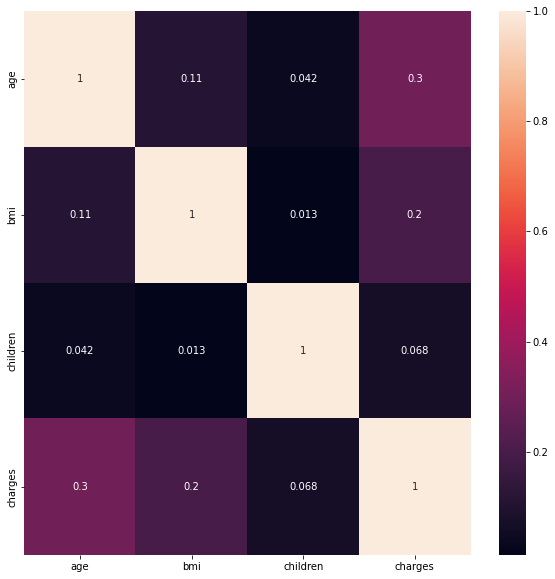

In [12]:
#heatmap of correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

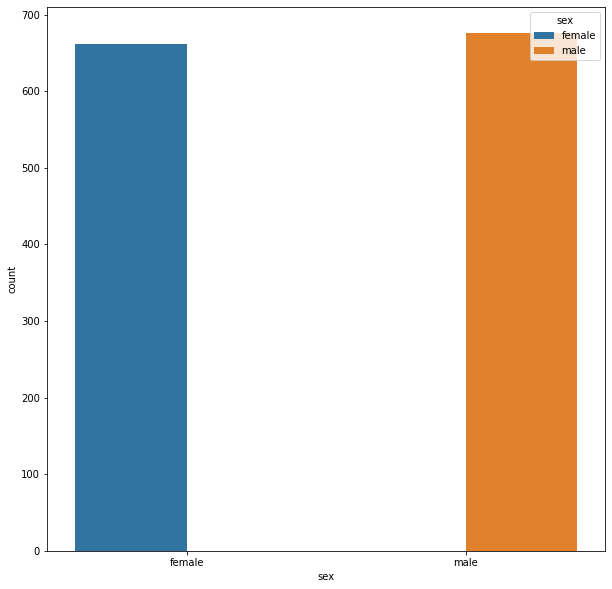

In [13]:
#count plot of specific column
plt.figure(figsize=(10,10))
sns.countplot(x='sex',data=df,hue='sex')

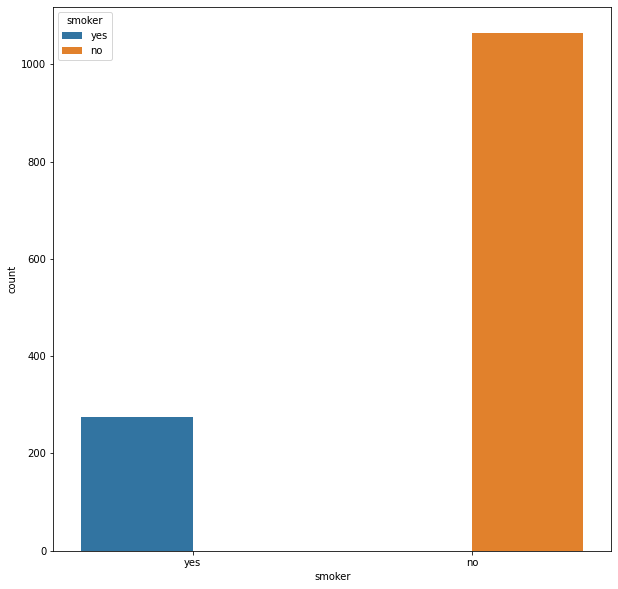

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x='smoker',data=df,hue='smoker')

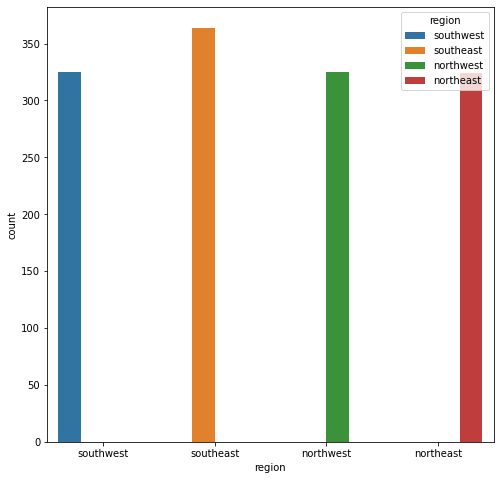

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(x='region',data=df,hue='region')

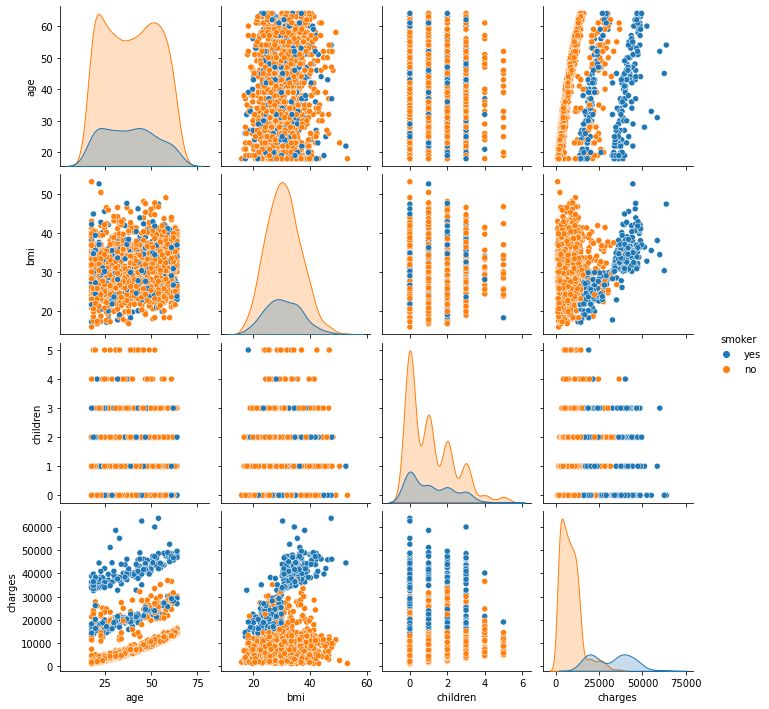

In [16]:
#paiplot of column 'smoker'
sns.pairplot(data=df,hue='smoker')

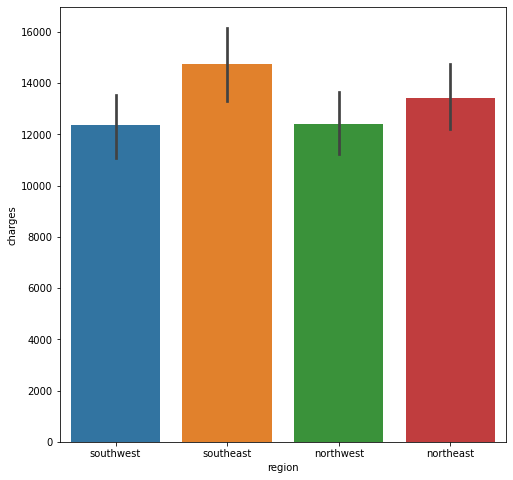

In [17]:
plt.figure(figsize=(8,8))
sns.barplot(x='region',y='charges',data=df)

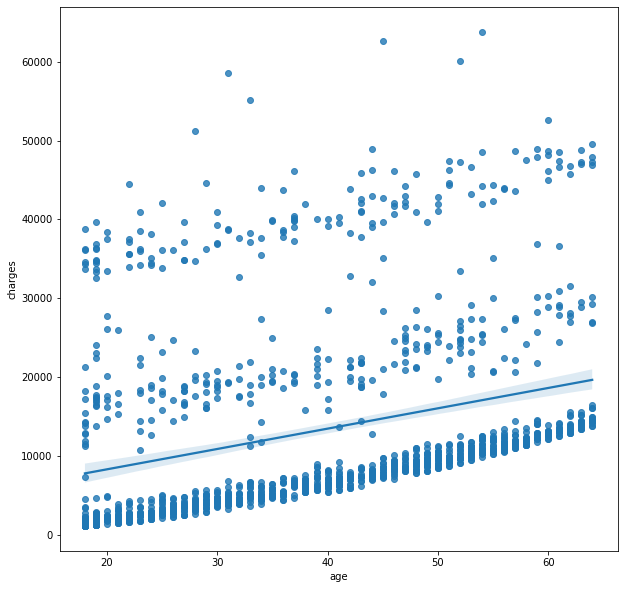

In [18]:
plt.figure(figsize=(10,10))
sns.regplot(x='age',y='charges',data=df)

In [19]:
#drop unwanted columns
df.drop(['children','region'],axis=1,inplace=True)
df.head()

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520


In [20]:
#pass 1,0 values in smoker and sex columns
df.replace({'sex':{'male':1,'female':0}},inplace=True)
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)
df

,age,sex,bmi,smoker,charges
0,19,0,27.900,1,16884.92400
1,18,1,33.770,0,1725.55230
2,28,1,33.000,0,4449.46200
3,33,1,22.705,0,21984.47061
4,32,1,28.880,0,3866.85520
...,...,...,...,...,...
1333,50,1,30.970,0,10600.54830
1334,18,0,31.920,0,2205.98080
1335,18,0,36.850,0,1629.83350
1336,21,0,25.800,0,2007.94500


In [46]:
# collect input as x
x=df.drop(['charges'],axis=1)
x

,age,sex,bmi,smoker
0,19,0,27.900,1
1,18,1,33.770,0
2,28,1,33.000,0
3,33,1,22.705,0
4,32,1,28.880,0
...,...,...,...,...
1333,50,1,30.970,0
1334,18,0,31.920,0
1335,18,0,36.850,0
1336,21,0,25.800,0


In [47]:
#collect output as y
y=df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [48]:
#use sklear.model_selection to splitting x,y in training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,age,sex,bmi,smoker
560,46,0,19.950,0
1285,47,0,24.320,0
1142,52,0,24.860,0
969,39,0,34.320,0
486,54,0,21.470,0
...,...,...,...,...
1095,18,0,31.350,0
1130,39,0,23.870,0
1294,58,1,25.175,0
860,37,0,47.600,1


In [49]:
#use MinMaxscaler to normilize input values
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
x_train=min_max.fit_transform(x_train)
x_test=min_max.fit_transform(x_test)

In [50]:
#use Random Forest algorithm for predicting the result
from sklearn.ensemble import RandomForestRegressor
rand=RandomForestRegressor(n_estimators=100)
rand.fit(x_train,y_train)
y_pred=rand.predict(x_test)
y_pred

array([10964.2966391 ,  5351.2634164 , 27873.913349  ,  9841.7361592 ,
       34601.9429952 ,  7296.5278978 ,  4360.9841405 , 15110.8108875 ,
        6216.0212137 , 10975.0633117 , 17644.5375949 ,  7413.0066425 ,
        4199.811856  , 45809.452754  , 48704.0603594 , 45057.5596954 ,
       10153.1248405 , 42546.2210812 , 21543.4613037 , 24567.7242124 ,
        5554.4523383 ,  8539.4135135 ,  4780.76441438,  2504.101954  ,
       17236.2903388 , 13266.49598472, 20027.0592601 ,  9686.6636271 ,
       10650.7623633 ,  2921.2242626 ,  6540.6157715 , 13129.42578713,
        4300.3729373 ,  5137.7395562 , 10681.0102261 ,  8522.3618085 ,
        2163.3980705 , 12667.2921419 , 24438.890768  , 39267.0029132 ,
        4949.2945794 ,  4534.1412188 , 12462.763925  , 13478.48236777,
        5753.3130036 , 12681.4628007 ,  9874.447916  ,  4894.3569067 ,
       41652.9891531 ,  7467.0026809 , 14599.2313598 ,  2874.1082767 ,
        6061.329014  ,  2021.4472974 , 11567.9117145 ,  9314.269899  ,
      

In [51]:

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8341050226828562


In [52]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test,y_pred))

0.3862955766278817


In [53]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

2854.4423619136746


In [54]:
from  sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

25754984.789343104


In [55]:
print(np.sqrt(mean_absolute_error(y_test,y_pred)))

53.42698159089352


In [56]:
#pass actual value and Predicted value as a DataFrame
datas=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred})
datas

,Actual_value,Predicted_value
764,9095.06825,10964.296639
887,5272.17580,5351.263416
890,29330.98315,27873.913349
1293,9301.89355,9841.736159
259,33750.29180,34601.942995
...,...,...
109,47055.53210,47533.897832
575,12222.89830,15318.850265
535,6067.12675,6008.637160
543,63770.42801,47143.451518


Text(0.5, 1.0, 'Testing And Prediction Data Graph')

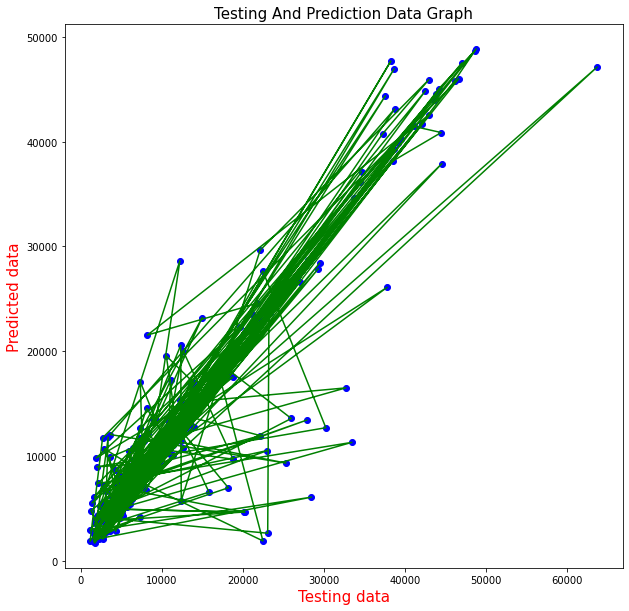

In [57]:
#using matplotlib plot Actual data and Predicted data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred,color='blue')
plt.plot(y_test,y_pred,color='g')
plt.xlabel("Testing data",color='red',size=15)
plt.ylabel("Predicted data",color='red',size=15)
plt.title("Testing And Prediction Data Graph",size=15)

In [58]:
#Prediction Result
print(rand.predict(min_max.transform([[19,0,27.900,1]])))

[17193.511287]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
